# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total = len(cities) - 1
print(total)

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame(columns = ["City", "Cloudiness (%)", "Country", "Date", "Humidity (%)", "Latitude", "Longitude", "Max Temperature (°F)", "Wind Speed (MPH)"])


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval\n-----------------------------")

idx = 0    

for idx, city in enumerate(cities):
    try:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        weather_df.set_value(idx, 'City', weather_json['name'])
        weather_df.set_value(idx, 'Cloudiness (%)', weather_json["clouds"]['all'])
        weather_df.set_value(idx, 'Country', weather_json["sys"]["country"])
        weather_df.set_value(idx, 'Date', weather_json['dt']) 
        weather_df.set_value(idx, 'Humidity (%)', weather_json['main']['humidity'])
        weather_df.set_value(idx, 'Latitude', weather_json['coord']['lat'])
        weather_df.set_value(idx, 'Longitude', weather_json['coord']['lon'])
        weather_df.set_value(idx, 'Max Temperature (°F)', weather_json['main']['temp_max'])
        weather_df.set_value(idx, 'Wind Speed (MPH)', weather_json['wind']['speed'])
        print(f"Processing Record {idx} of {total} | {city}")
        time.sleep(1.01)
        idx = idx + 1
    except:
        print(f"Information for {city} could not be found.")

print("-----------------------------\nData Retrieval Complete\n-----------------------------")    
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of 627 | lata


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Processing Record 1 of 627 | boueni
Processing Record 2 of 627 | kapaa
Processing Record 3 of 627 | petrozavodsk
Processing Record 4 of 627 | apostolove
Processing Record 5 of 627 | cidreira
Processing Record 6 of 627 | sinnamary
Processing Record 7 of 627 | bluff
Processing Record 8 of 627 | ushuaia
Processing Record 9 of 627 | ayan
Information for bengkulu could not be found.
Information for krasnoselkup could not be found.
Processing Record 12 of 627 | hasaki
Processing Record 13 of 627 | half moon bay
Processing Record 14 of 627 | omboue
Processing Record 15 of 627 | bredasdorp
Processing Record 16 of 627 | moranbah
Processing Record 17 of 627 | pauini
Processing Record 18 of 627 | hilo
Processing Record 19 of 627 | yellowknife
Processing Record 20 of 627 | havre-saint-pierre
Processing Record 21 of 627 | albany
Information for satitoa could not be found.
Processing Record 23 of 627 | hattiesburg
Processing Record 24 of 627 | mount gambier
Information for bac lieu could not be foun

Processing Record 203 of 627 | biak
Processing Record 204 of 627 | bulgan
Processing Record 205 of 627 | lavrentiya
Processing Record 206 of 627 | bodden town
Processing Record 207 of 627 | kimbe
Processing Record 208 of 627 | bembereke
Processing Record 209 of 627 | mahibadhoo
Processing Record 210 of 627 | aleksandrov gay
Information for mys shmidta could not be found.
Processing Record 212 of 627 | codrington
Processing Record 213 of 627 | kendari
Processing Record 214 of 627 | sao joao da barra
Processing Record 215 of 627 | san patricio
Information for malakal could not be found.
Processing Record 217 of 627 | araouane
Processing Record 218 of 627 | yaritagua
Processing Record 219 of 627 | santa marta
Processing Record 220 of 627 | grindavik
Processing Record 221 of 627 | sambava
Processing Record 222 of 627 | hobyo
Processing Record 223 of 627 | namibe
Information for porto santo could not be found.
Processing Record 225 of 627 | itoman
Processing Record 226 of 627 | loanda
Proce

Processing Record 403 of 627 | pozo colorado
Processing Record 404 of 627 | qaqortoq
Processing Record 405 of 627 | tuatapere
Processing Record 406 of 627 | benghazi
Processing Record 407 of 627 | gbarnga
Processing Record 408 of 627 | portland
Processing Record 409 of 627 | tafresh
Processing Record 410 of 627 | emba
Information for maneadero could not be found.
Processing Record 412 of 627 | porto empedocle
Processing Record 413 of 627 | oistins
Processing Record 414 of 627 | altamira
Processing Record 415 of 627 | la rioja
Processing Record 416 of 627 | palmerston
Processing Record 417 of 627 | luena
Processing Record 418 of 627 | serra talhada
Processing Record 419 of 627 | kostino
Processing Record 420 of 627 | batagay-alyta
Information for kamenskoye could not be found.
Processing Record 422 of 627 | ust-kuyga
Processing Record 423 of 627 | rio gallegos
Processing Record 424 of 627 | mangan
Processing Record 425 of 627 | miyako
Processing Record 426 of 627 | koulikoro
Information

Processing Record 605 of 627 | nanakuli
Processing Record 606 of 627 | aberdare
Processing Record 607 of 627 | doha
Processing Record 608 of 627 | sioux lookout
Processing Record 609 of 627 | acari
Processing Record 610 of 627 | erzin
Processing Record 611 of 627 | mehtar lam
Processing Record 612 of 627 | estelle
Information for mullaitivu could not be found.
Processing Record 614 of 627 | caravelas
Processing Record 615 of 627 | zharkent
Processing Record 616 of 627 | peruibe
Processing Record 617 of 627 | sertanopolis
Processing Record 618 of 627 | ukiah
Processing Record 619 of 627 | uyuni
Information for duz could not be found.
Processing Record 621 of 627 | egersund
Processing Record 622 of 627 | kahului
Processing Record 623 of 627 | bucksport
Processing Record 624 of 627 | ciudad del maiz
Processing Record 625 of 627 | ugoofaaru
Processing Record 626 of 627 | muravlenko
Processing Record 627 of 627 | koceljeva
-----------------------------
Data Retrieval Complete
--------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.to_csv("City_Data.csv")
weather_df.head()


,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temperature (°F),Wind Speed (MPH)
0,Lata,0,IN,1544321763,58,30.78,78.62,37.47,2.26
1,Boueni,20,YT,1544320800,78,-12.9,45.08,82.4,10.29
2,Kapaa,90,US,1544320560,57,22.08,-159.32,78.98,24.16
3,Petrozavodsk,92,RU,1544320800,79,61.79,34.39,24.8,8.95
4,Apostolove,90,UA,1544320800,93,47.66,33.71,35.6,13.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

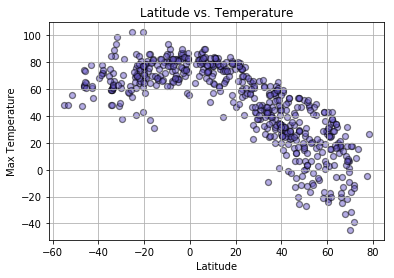

In [5]:
lat_temp = plt.scatter(x = weather_df['Latitude'], y = weather_df["Max Temperature (°F)"], c = 'SlateBlue', alpha = 0.5, edgecolors = "black", linewidth = 1.25)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Temperature')
plt.grid()
plt.savefig('Latitude vs. Temperature.png')
plt.show()


#### Latitude vs. Humidity Plot

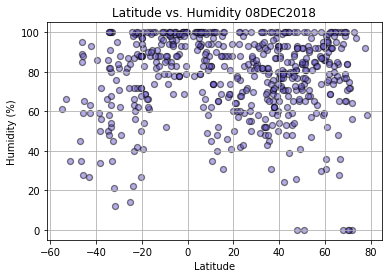

In [6]:
plt.scatter(x = weather_df['Latitude'], y = weather_df["Humidity (%)"], c = "SlateBlue", alpha = 0.5, edgecolors = "black", linewidth = 1.25)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity 08DEC2018')
plt.grid()
plt.savefig('Latitude vs. Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

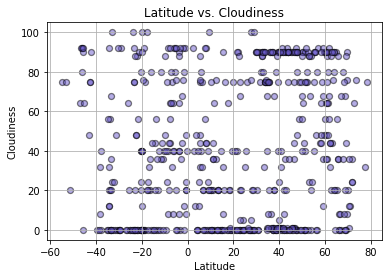

In [7]:
plt.scatter(x = weather_df['Latitude'], y = weather_df["Cloudiness (%)"], c = "SlateBlue", alpha = 0.5, edgecolors = "black", linewidth = 1.25)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid()
plt.savefig('Latitude vs. Cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

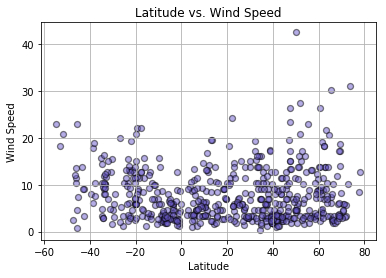

In [8]:
plt.scatter(x = weather_df['Latitude'], y = weather_df["Wind Speed (MPH)"], c = "SlateBlue", alpha = 0.5, edgecolors = "black", linewidth = 1.25)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid()
plt.savefig('Latitude vs. Wind Speed.png')
plt.show()
